In [1]:
import numpy as np
import matplotlib.pyplot as plt


Gaussian Δt=1: n=580000, mean=0.00006, var=0.00040
Gaussian Δt=3: n=578400, mean=0.00017, var=0.00120
Gaussian Δt=9: n=573600, mean=0.00052, var=0.00359
Gaussian Δt=27: n=559200, mean=0.00155, var=0.01077
Gaussian Δt=81: n=516000, mean=0.00396, var=0.03235
Gaussian Δt=243: n=386400, mean=0.01188, var=0.09507
Skipping dt=726: dt must be < num_steps=726


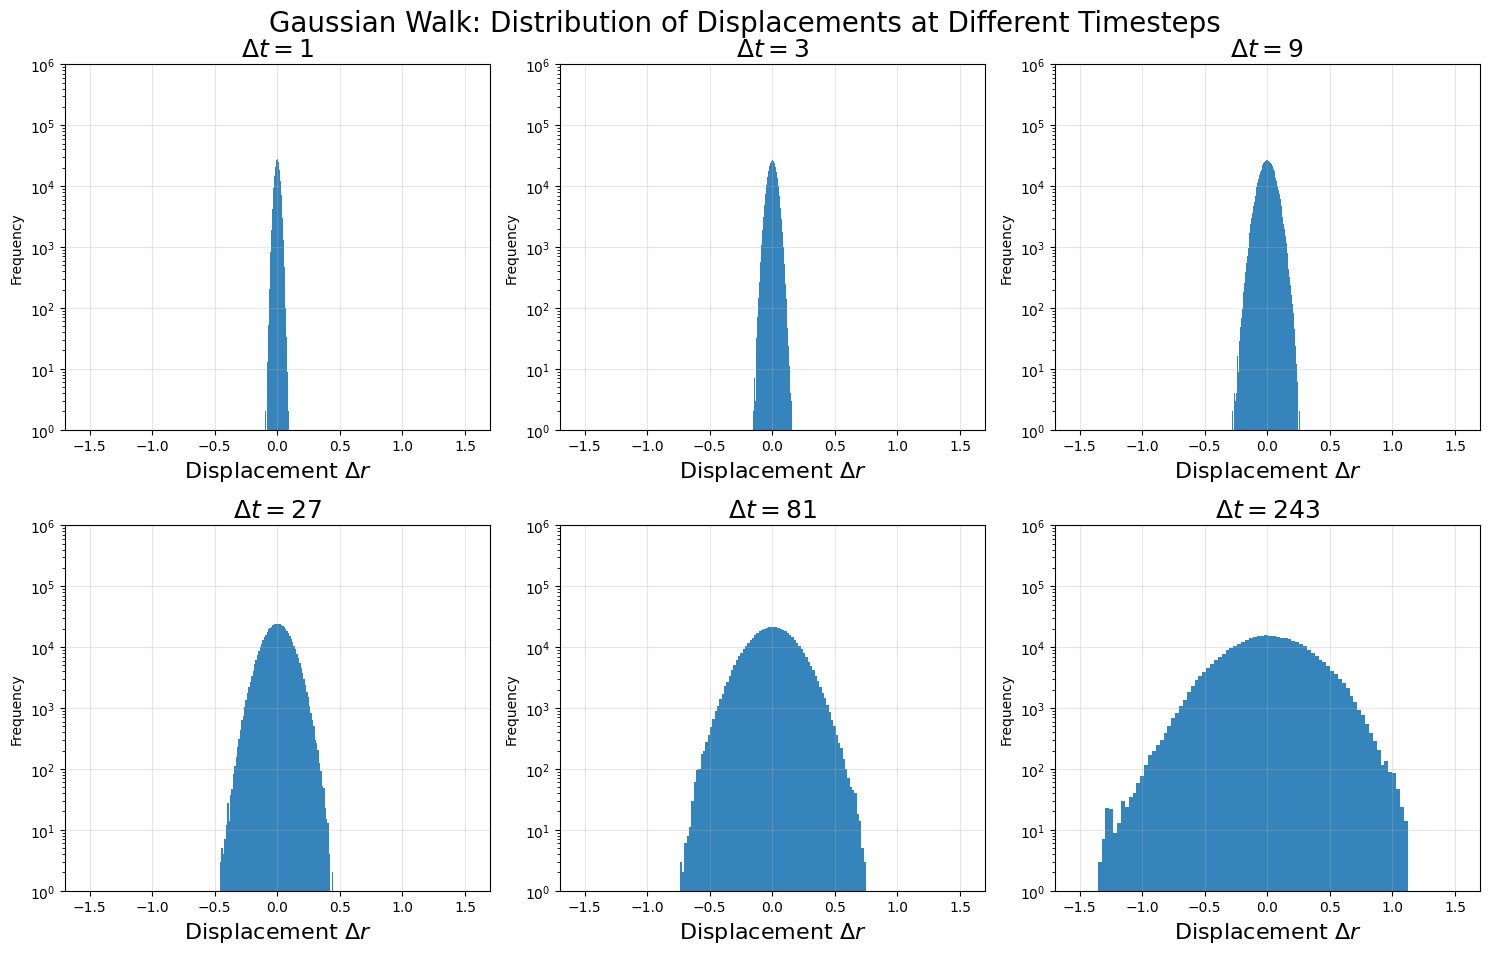

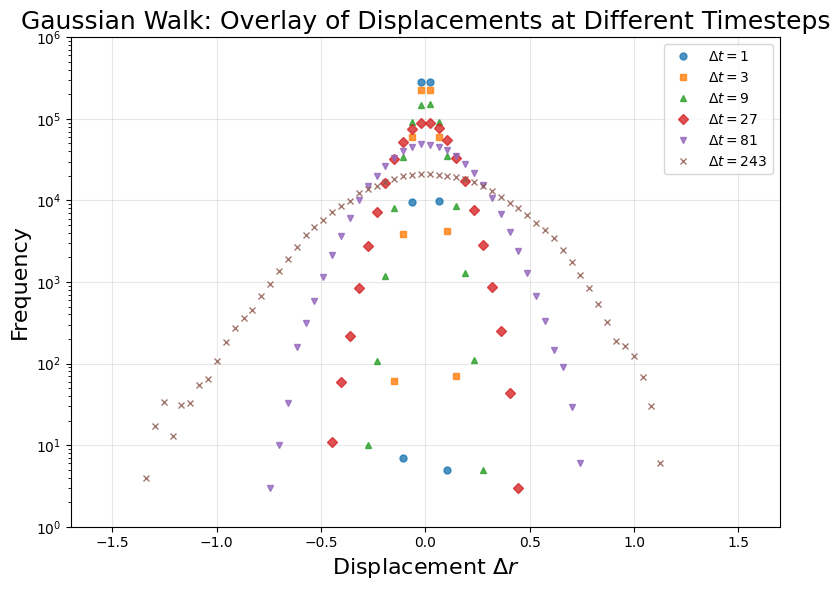

Gaussian log-returns Δt=1: n=580000, mean=-8.65559e-06, var=7.23925e-05
Gaussian log-returns Δt=3: n=578400, mean=-2.54455e-05, var=2.17950e-04
Gaussian log-returns Δt=9: n=573600, mean=-7.25247e-05, var=6.50603e-04
Gaussian log-returns Δt=27: n=559200, mean=-2.26574e-04, var=1.95092e-03
Gaussian log-returns Δt=81: n=516000, mean=-9.80688e-04, var=5.87345e-03
Gaussian log-returns Δt=243: n=386400, mean=-3.01691e-03, var=1.73314e-02
Skipping dt=726: dt must be < num_steps=726


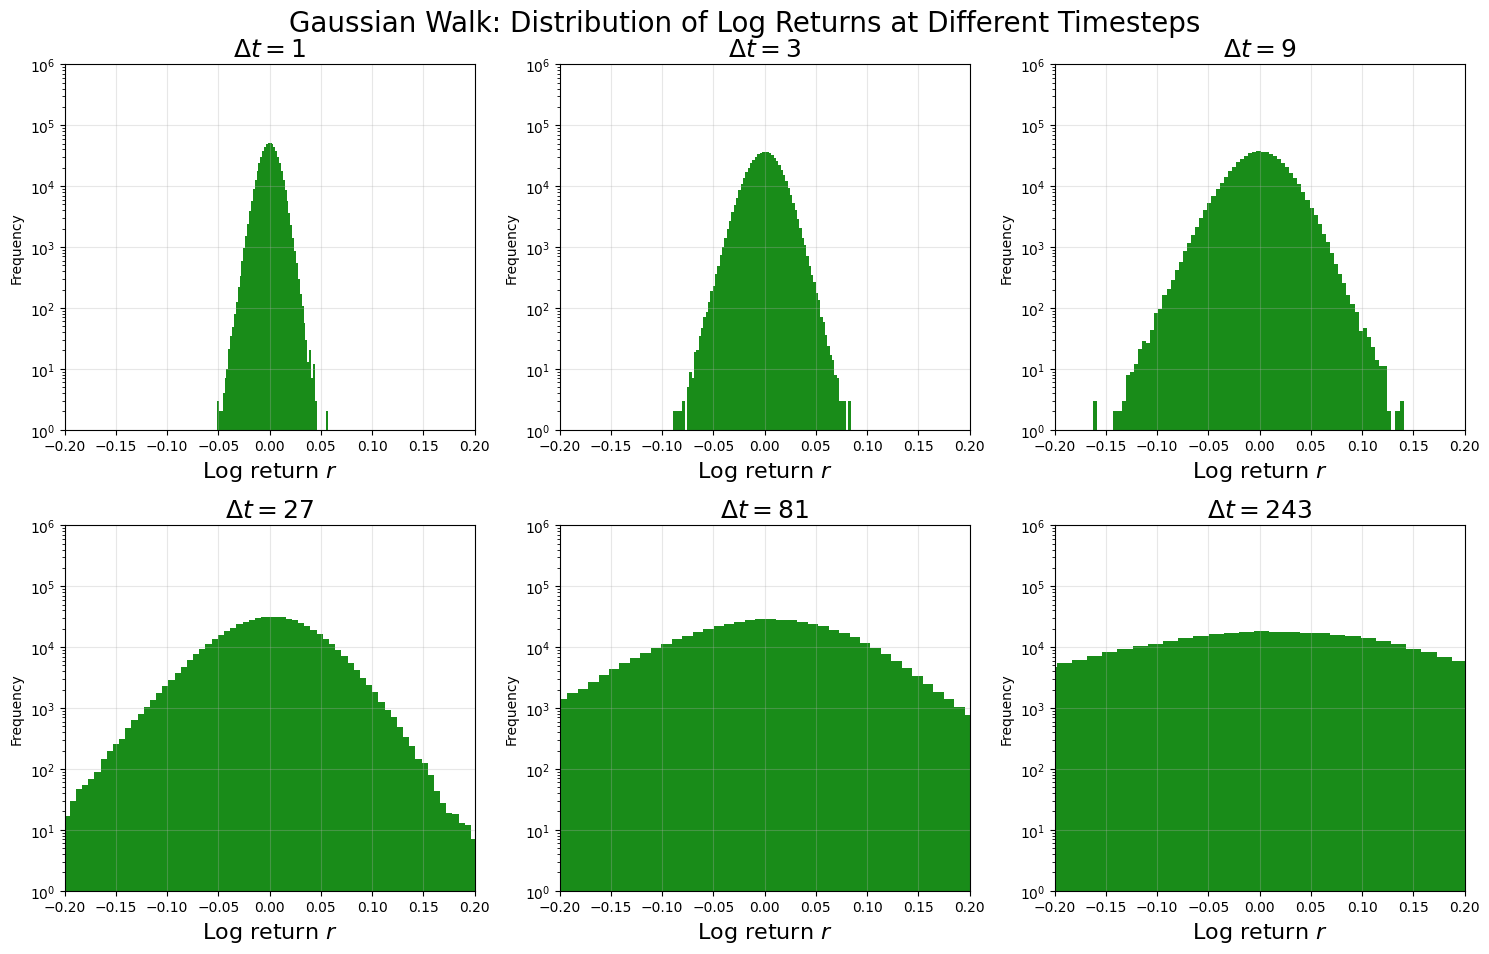

In [2]:
dt_values = [1, 3, 9, 27, 81, 243, 726]  # time lags to analyze
num_steps = 726                          # number of time steps
num_walks = 400                          # number of independent walkers
std_dev = 0.02                           # step standard deviation
box_size = 20.203051                     # only needed if you want periodic BC

np.random.seed(0)  # for reproducibility; remove/change if you want fresh realisations

# --- 1. Simulate Gaussian random walks (increments then cumulative sum to get positions) ---

# Steps: shape (num_walks, num_steps)
steps_x = np.random.normal(0, std_dev, size=(num_walks, num_steps))
steps_y = np.random.normal(0, std_dev, size=(num_walks, num_steps))

# Positions: cumulative sum along time axis
x = np.cumsum(steps_x, axis=1)
y = np.cumsum(steps_y, axis=1)

# OPTIONAL: if you want to mimic periodic boundaries like the bubbles, you could do
# x = np.mod(x, box_size)
# y = np.mod(y, box_size)
# but then you should also use minimum-image convention for displacements, which
# I’m not doing here to keep the Gaussian reference as clean as possible.

# --- 2. Per-dt histograms (like your bubble panel plot) ---

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()
plt.suptitle('Gaussian Walk: Distribution of Displacements at Different Timesteps',
             fontsize=20, y=0.95)

for idx, dt in enumerate(dt_values):
    if dt >= num_steps:
        print(f"Skipping dt={dt}: dt must be < num_steps={num_steps}")
        continue

    # For each walk, compute displacements x(t+dt) - x(t), same for y
    # x[:, dt:] and x[:, :-dt] both have shape (num_walks, num_steps - dt)
    dx_dt = x[:, dt:] - x[:, :-dt]
    dy_dt = y[:, dt:] - y[:, :-dt]

    # Flatten and combine components just like with bubbles
    all_disp = np.concatenate([dx_dt.ravel(), dy_dt.ravel()])

    # Histogram
    axs[idx].hist(all_disp, bins=80, alpha=0.9)
    axs[idx].set_title(rf"$\Delta t = {dt}$", fontsize=18)
    axs[idx].grid(alpha=0.3)
    axs[idx].set_yscale('log')
    axs[idx].set_xlim(-1.7, 1.7)
    axs[idx].set_ylim(1, 1e6)
    axs[idx].set_xlabel(r"Displacement $\Delta r$", fontsize=16)
    axs[idx].set_ylabel("Frequency")

    print(f"Gaussian Δt={dt}: n={len(all_disp)}, mean={np.mean(all_disp):.5f}, var={np.var(all_disp):.5f}")

plt.tight_layout(rect=[0, 0, 1, 0.98])
# plt.savefig("Figures/Gaussian_displacement_distributions.png", dpi=300, bbox_inches='tight')
plt.show()


# --- 3. Overlay plot (all dt on one figure, like bubble overlay) ---

plt.figure(figsize=(8, 6))
markers = ['o', 's', '^', 'D', 'v', 'x']

for idx, dt in enumerate(dt_values):
    if dt >= num_steps:
        continue

    dx_dt = x[:, dt:] - x[:, :-dt]
    dy_dt = y[:, dt:] - y[:, :-dt]
    all_disp = np.concatenate([dx_dt.ravel(), dy_dt.ravel()])

    counts, bin_edges = np.histogram(all_disp, bins=80, range=(-1.7, 1.7))
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

    plt.plot(bin_centers, counts,
             marker=markers[idx % len(markers)],
             linestyle='none',
             label=rf'$\Delta t = {dt}$',
             alpha=0.8,
             markersize=5)

plt.yscale('log')
plt.xlim(-1.7, 1.7)
plt.ylim(1, 1e6)
plt.xlabel(r"Displacement $\Delta r$", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.title("Gaussian Walk: Overlay of Displacements at Different Timesteps", fontsize=18)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
# plt.savefig("Figures/Gaussian_displacement_overlay.png", dpi=300, bbox_inches='tight')
plt.show()



# 1. Construct positive "prices"
offset_x = 1.0 - x.min()
offset_y = 1.0 - y.min()

Sx = x + offset_x
Sy = y + offset_y

# 2. Log-return panel plot (same layout as displacement distributions)

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()
plt.suptitle('Gaussian Walk: Distribution of Log Returns at Different Timesteps',
             fontsize=20, y=0.95)

for idx, dt in enumerate(dt_values):
    if dt >= num_steps:
        print(f"Skipping dt={dt}: dt must be < num_steps={num_steps}")
        continue

    # compute dt-lag log returns
    rx = np.log(Sx[:, dt:] / Sx[:, :-dt])
    ry = np.log(Sy[:, dt:] / Sy[:, :-dt])

    # flatten and combine
    all_lr = np.concatenate([rx.ravel(), ry.ravel()])

    axs[idx].hist(all_lr, bins=80, alpha=0.9, color='green')
    axs[idx].set_title(rf"$\Delta t = {dt}$", fontsize=18)
    axs[idx].grid(alpha=0.3)
    axs[idx].set_yscale('log')
    axs[idx].set_xlim(-0.2, 0.2)      # typical range for Gaussian log-returns
    axs[idx].set_ylim(1, 1e6)
    axs[idx].set_xlabel(r"Log return $r$", fontsize=16)
    axs[idx].set_ylabel("Frequency")

    print(f"Gaussian log-returns Δt={dt}: n={len(all_lr)}, "
          f"mean={np.mean(all_lr):.5e}, var={np.var(all_lr):.5e}")

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

/var/folders/l1/x0797x3512d9sktcpm47npbh0000gn/T/ipykernel_14307/4254379588.py:70: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 1e6)


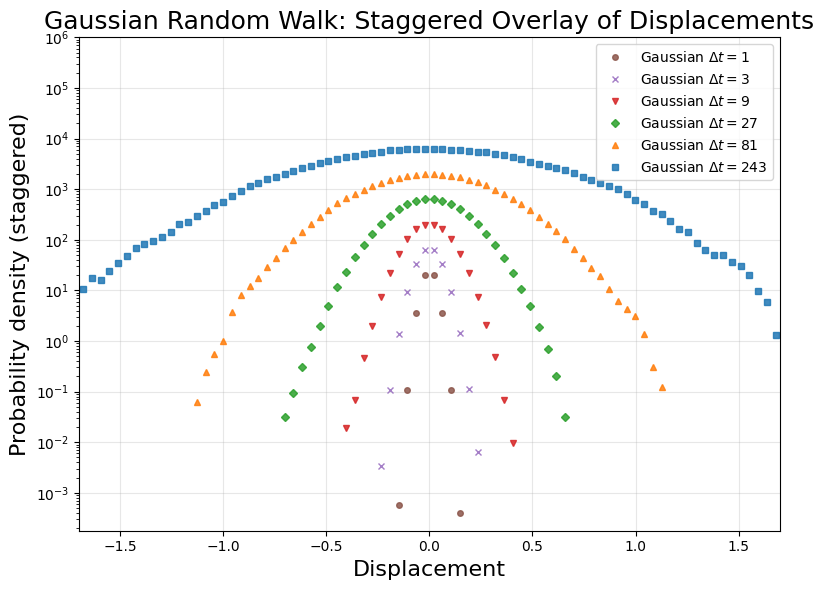

/var/folders/l1/x0797x3512d9sktcpm47npbh0000gn/T/ipykernel_14307/4254379588.py:146: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 1e6)


Min Sx, Sy: 1.0 1.0


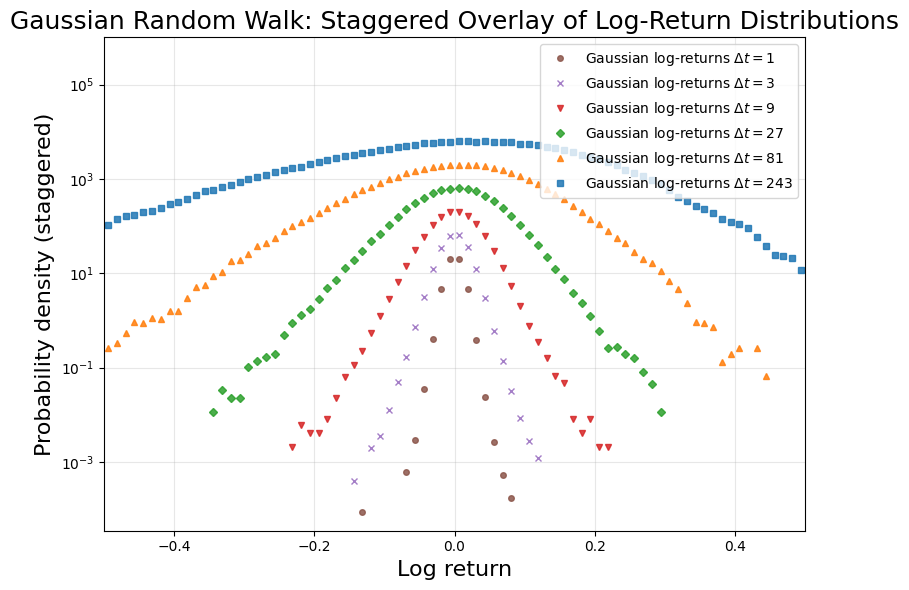

In [3]:
dt_values = [1, 3, 9, 27, 81, 243, 726]
num_steps = 726
num_walks = 400
std_dev = 0.03      # Gaussian step size
box_size = 20.203051  # not used unless doing periodic BC

np.random.seed(0)  # reproducibility

# ==========================================
# 1. Generate Gaussian random walk positions
# ==========================================

# Steps: shape (num_walks, num_steps)
steps_x = np.random.normal(0, std_dev, size=(num_walks, num_steps))
steps_y = np.random.normal(0, std_dev, size=(num_walks, num_steps))

# Positions: cumulative sum along time axis
x_gauss = np.cumsum(steps_x, axis=1)
y_gauss = np.cumsum(steps_y, axis=1)

# ==========================================
# 2. Staggered overlay plot (Gaussian version)
# ==========================================

plt.figure(figsize=(8, 6))
markers = ['o', 's', '^', 'D', 'v', 'x']

dt_plot_order = sorted(dt_values, reverse=True)
top_peak = 2e4
decade_step = 0.50     # 0.5 decades separation

for idx, dt in enumerate(dt_plot_order):

    if dt >= num_steps:
        continue

    # --- Compute Δx and Δy across dt for all walks ---
    dx_dt = x_gauss[:, dt:] - x_gauss[:, :-dt]
    dy_dt = y_gauss[:, dt:] - y_gauss[:, :-dt]

    # Flatten and combine components (same as bubble analysis)
    all_disp = np.concatenate([dx_dt.ravel(), dy_dt.ravel()])

    # Centre to align peaks at x ≈ 0
    all_disp -= all_disp.mean()

    # Histogram → PDF (density=True)
    bins = 80
    rng = (-1.7, 1.7)
    counts, bin_edges = np.histogram(all_disp, bins=bins, range=rng, density=True)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

    # Stagger peaks on log axis
    current_peak = counts.max() if counts.max() > 0 else 1.0
    target_peak = top_peak * (10 ** (-decade_step * idx))
    scale = target_peak / current_peak
    counts_scaled = counts * scale

    # Plot
    plt.plot(
        bin_centers, counts_scaled,
        marker=markers[idx % len(markers)], linestyle='none',
        label=rf'Gaussian $\Delta t = {dt}$',
        alpha=0.85, markersize=4
    )

# Formatting
plt.yscale('log')
plt.xlim(-1.7, 1.7)
plt.ylim(0, 1e6)
plt.xlabel("Displacement", fontsize=16)
plt.ylabel("Probability density (staggered)", fontsize=16)
plt.title("Gaussian Random Walk: Staggered Overlay of Displacements", fontsize=18)
plt.grid(alpha=0.3)

# Reverse legend (match bubble plot styling)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc="upper right")

plt.tight_layout()
plt.show()



# ==========================================
# Log returns of Gaussian walks + staggered overlay
# ==========================================

# 1) Build strictly positive "price-like" series from positions
offset_x = 1.0 - x_gauss.min()
offset_y = 1.0 - y_gauss.min()

Sx = x_gauss + offset_x   # shape (num_walks, num_steps)
Sy = y_gauss + offset_y

# Sanity: ensure positivity
print("Min Sx, Sy:", Sx.min(), Sy.min())

# 2) Staggered overlay of log-return PDFs for different dt

plt.figure(figsize=(8, 6))
markers = ['o', 's', '^', 'D', 'v', 'x']

dt_plot_order = sorted(dt_values, reverse=True)

top_peak = 2e4       # same as before, tune if needed
decade_step = 0.50   # separation between curves in log10 decades

for idx, dt in enumerate(dt_plot_order):
    if dt >= num_steps:
        continue

    # log returns over lag dt
    # r = log(S_{t+dt} / S_t)
    rx = np.log(Sx[:, dt:] / Sx[:, :-dt])
    ry = np.log(Sy[:, dt:] / Sy[:, :-dt])

    # pool components
    all_logret = np.concatenate([rx.ravel(), ry.ravel()])

    # centre (mean ~ 0) for nicer comparison
    all_logret -= all_logret.mean()

    # histogram → PDF
    bins = 80
    # pick a reasonable range for log returns; adjust if you see clipping
    rng = (-0.5, 0.5)
    counts, bin_edges = np.histogram(all_logret, bins=bins, range=rng, density=True)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

    # stagger peaks in log space
    current_peak = counts.max() if counts.max() > 0 else 1.0
    target_peak = top_peak * (10 ** (-decade_step * idx))
    scale = target_peak / current_peak
    counts_scaled = counts * scale

    plt.plot(
        bin_centers, counts_scaled,
        marker=markers[idx % len(markers)], linestyle='none',
        label=rf'Gaussian log-returns $\Delta t = {dt}$',
        alpha=0.85, markersize=4
    )

plt.yscale('log')
plt.xlim(-0.5, 0.5)   # match rng above
plt.ylim(0, 1e6)
plt.xlabel("Log return", fontsize=16)
plt.ylabel("Probability density (staggered)", fontsize=16)
plt.title("Gaussian Random Walk: Staggered Overlay of Log-Return Distributions", fontsize=18)
plt.grid(alpha=0.3)

# reverse legend order to match your bubble-style
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc="upper right")

plt.tight_layout()
plt.show()

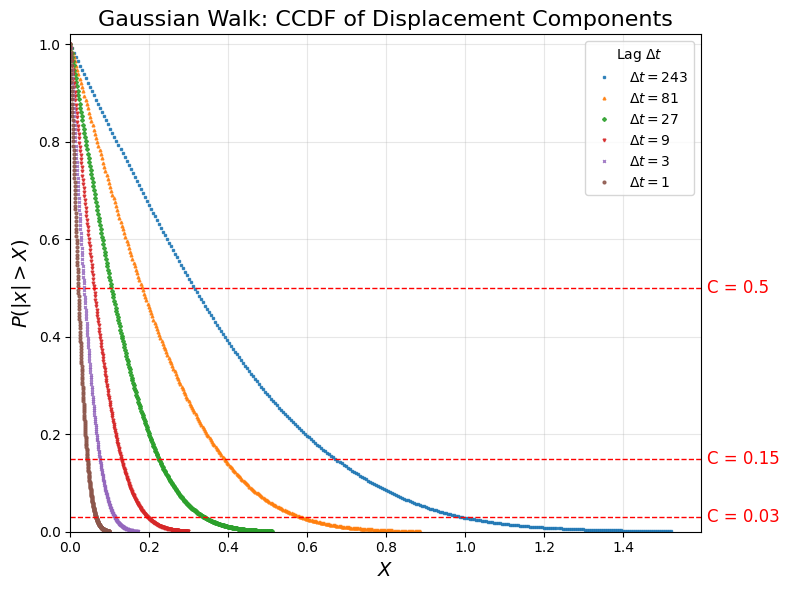

Min Sx, Sy: 1.0 1.0


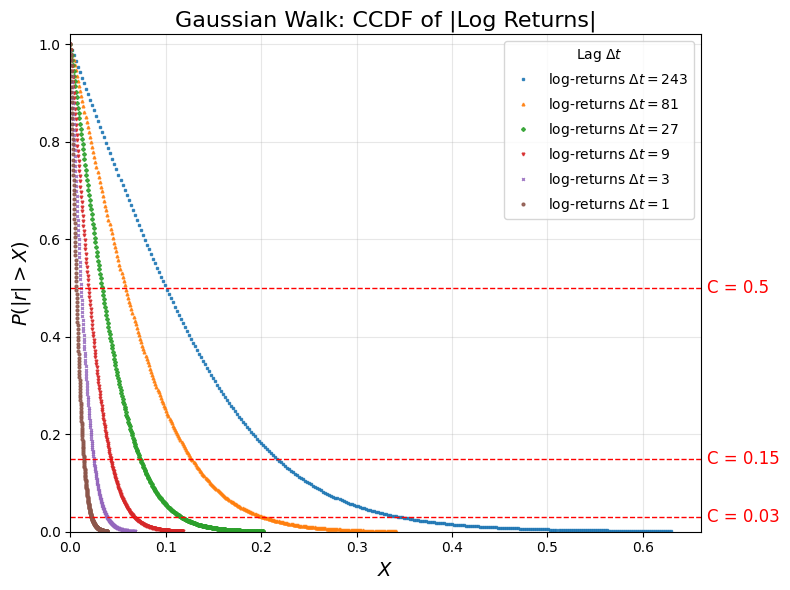

In [4]:
plt.figure(figsize=(8, 6))
markers = ['o', 's', '^', 'D', 'v', 'x']

C_vals = [0.50, 0.15, 0.03]
dt_plot_order = sorted(dt_values, reverse=True)

for idx, dt in enumerate(dt_plot_order):
    if dt >= num_steps:
        continue

    # dt-lag displacements
    dx_dt = x_gauss[:, dt:] - x_gauss[:, :-dt]
    dy_dt = y_gauss[:, dt:] - y_gauss[:, :-dt]

    disp = np.concatenate([dx_dt.ravel(), dy_dt.ravel()])
    vals = np.abs(disp)

    vals_sorted = np.sort(vals)
    n = vals_sorted.size

    # X grid up to 99.9th percentile
    X = np.linspace(0, np.quantile(vals_sorted, 0.999), 300)

    # Empirical CDF and CCDF
    F = np.searchsorted(vals_sorted, X, side='right') / n
    CCDF = 1.0 - F

    plt.plot(
        X, CCDF,
        marker=markers[idx % len(markers)],
        linestyle='none', ms=2, alpha=0.85,
        label=rf'$\Delta t = {dt}$'
    )

# Horizontal C lines
for C in C_vals:
    plt.axhline(y=C, color='red', linestyle='--', linewidth=1)
    # label slightly to the right of current xlim
    xmax = plt.xlim()[1]
    plt.text(
        1.01 * xmax, C, f"C = {C}",
        va='center', ha='left', fontsize=12, color='red'
    )

plt.ylim(0, 1.02)
plt.xlim(left=0)
plt.ylabel(r"$P(|x|>X)$", fontsize=14)
plt.xlabel(r"$X$", fontsize=14)
plt.title("Gaussian Walk: CCDF of Displacement Components", fontsize=16)
plt.grid(alpha=0.3)
plt.legend(title=r"Lag $\Delta t$")
plt.tight_layout()
plt.show()




# Build strictly positive series from positions (like synthetic prices)
offset_x = 1.0 - x_gauss.min()
offset_y = 1.0 - y_gauss.min()

Sx = x_gauss + offset_x
Sy = y_gauss + offset_y

print("Min Sx, Sy:", Sx.min(), Sy.min())  # sanity check they’re > 0

plt.figure(figsize=(8, 6))
markers = ['o', 's', '^', 'D', 'v', 'x']

C_vals = [0.50, 0.15, 0.03]
dt_plot_order = sorted(dt_values, reverse=True)

for idx, dt in enumerate(dt_plot_order):
    if dt >= num_steps:
        continue

    # log returns over lag dt
    rx = np.log(Sx[:, dt:] / Sx[:, :-dt])
    ry = np.log(Sy[:, dt:] / Sy[:, :-dt])

    vals = np.abs(np.concatenate([rx.ravel(), ry.ravel()]))

    vals_sorted = np.sort(vals)
    n = vals_sorted.size

    # X grid up to 99.9th percentile of |log-returns|
    X = np.linspace(0, np.quantile(vals_sorted, 0.999), 300)

    F = np.searchsorted(vals_sorted, X, side='right') / n
    CCDF = 1.0 - F

    plt.plot(
        X, CCDF,
        marker=markers[idx % len(markers)],
        linestyle='none', ms=2, alpha=0.85,
        label=rf'log-returns $\Delta t = {dt}$'
    )

# Horizontal C lines
for C in C_vals:
    plt.axhline(y=C, color='red', linestyle='--', linewidth=1)
    xmax = plt.xlim()[1]
    plt.text(
        1.01 * xmax, C, f"C = {C}",
        va='center', ha='left', fontsize=12, color='red'
    )

plt.ylim(0, 1.02)
plt.xlim(left=0)
plt.ylabel(r"$P(|r|>X)$", fontsize=14)
plt.xlabel(r"$X$", fontsize=14)
plt.title("Gaussian Walk: CCDF of |Log Returns|", fontsize=16)
plt.grid(alpha=0.3)
plt.legend(title=r"Lag $\Delta t$")
plt.tight_layout()
plt.show()

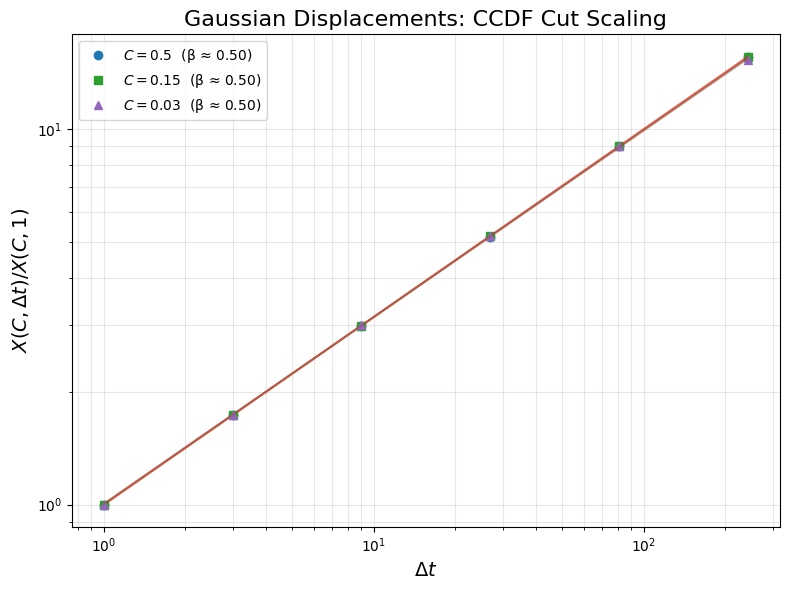

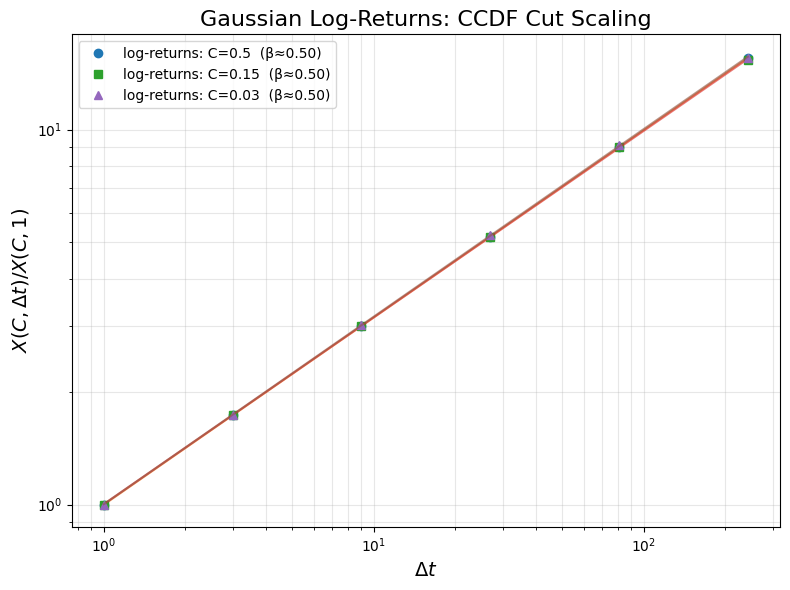

In [5]:
# ==========================================================
# CCDF CUT SCALING — GAUSSIAN DISPLACEMENTS
# ==========================================================

radial = False   # match bubble analysis option

def get_abs_displacements_gaussian(dt):
    """Return |displacement| sample over lag dt for Gaussian walks."""
    if dt >= num_steps:
        return np.array([])
    
    dx_dt = x_gauss[:, dt:] - x_gauss[:, :-dt]
    dy_dt = y_gauss[:, dt:] - y_gauss[:, :-dt]
    
    if radial:
        vals = np.sqrt(dx_dt**2 + dy_dt**2).ravel()
    else:
        vals = np.concatenate([dx_dt.ravel(), dy_dt.ravel()])
    
    return np.abs(vals)


# ----- ensure dt=1 is present -----
dt_plot_order = sorted(dt_values)
assert 1 in dt_plot_order, "Need Δt = 1 for scaling reference."

# ----- precompute |vals| samples -----
abs_samples = {
    dt: get_abs_displacements_gaussian(dt)
    for dt in dt_plot_order
    if len(get_abs_displacements_gaussian(dt)) > 0
}

# ----- compute X(C, dt) -----
C_vals = [0.50, 0.15, 0.03]
X_C_dt = {C: {} for C in C_vals}

for C in C_vals:
    q = 1.0 - C   # CCDF level ↔ quantile q = 1 - C
    for dt, vals in abs_samples.items():
        X_C_dt[C][dt] = float(np.quantile(vals, q))


# ==========================================================
# PLOT: X(C, dt) / X(C, 1)   (scaling test)
# ==========================================================

plt.figure(figsize=(8, 6))
markers = ['o', 's', '^', 'D', 'v', 'x']

for i, C in enumerate(C_vals):
    dts = np.array(sorted(X_C_dt[C].keys()))
    Xs  = np.array([X_C_dt[C][dt] for dt in dts])
    X1  = X_C_dt[C][1]
    
    ratio = Xs / X1

    # log–log linear fit
    logs = np.log(dts)
    beta, logA = np.polyfit(logs, np.log(ratio), 1)
    A = np.exp(logA)
    fit = A * dts**beta

    plt.loglog(
        dts, ratio,
        marker=markers[i % len(markers)],
        linestyle='none',
        label=rf"$C={C}$  (β ≈ {beta:.2f})"
    )
    plt.loglog(dts, fit, alpha=0.6)

plt.xlabel(r"$\Delta t$", fontsize=14)
plt.ylabel(r"$X(C, \Delta t) / X(C, 1)$", fontsize=14)
plt.title("Gaussian Displacements: CCDF Cut Scaling", fontsize=16)
plt.grid(alpha=0.3, which="both")
plt.legend()
plt.tight_layout()
plt.show()


# ==========================================================
# CCDF CUT SCALING — GAUSSIAN LOG RETURNS
# ==========================================================

# Build synthetic positive series
offset_x = 1 - x_gauss.min()
offset_y = 1 - y_gauss.min()
Sx = x_gauss + offset_x
Sy = y_gauss + offset_y

def get_abs_logreturns_gaussian(dt):
    """Return |log return| sample over lag dt for Gaussian walks."""
    if dt >= num_steps:
        return np.array([])
    
    rx = np.log(Sx[:, dt:] / Sx[:, :-dt])
    ry = np.log(Sy[:, dt:] / Sy[:, :-dt])
    
    vals = np.concatenate([rx.ravel(), ry.ravel()])
    return np.abs(vals)


# ----- precompute -----
abs_lr_samples = {
    dt: get_abs_logreturns_gaussian(dt)
    for dt in dt_plot_order
    if len(get_abs_logreturns_gaussian(dt)) > 0
}

# ----- compute X(C, dt) -----
X_C_dt_lr = {C: {} for C in C_vals}

for C in C_vals:
    q = 1.0 - C
    for dt, vals in abs_lr_samples.items():
        X_C_dt_lr[C][dt] = float(np.quantile(vals, q))


# ==========================================================
# PLOT: scaling: X(C, dt) / X(C, 1)
# ==========================================================

plt.figure(figsize=(8, 6))
for i, C in enumerate(C_vals):
    dts = np.array(sorted(X_C_dt_lr[C].keys()))
    Xs  = np.array([X_C_dt_lr[C][dt] for dt in dts])
    X1  = X_C_dt_lr[C][1]
    
    ratio = Xs / X1

    beta, logA = np.polyfit(np.log(dts), np.log(ratio), 1)
    A = np.exp(logA)
    fit = A * dts**beta

    plt.loglog(
        dts, ratio,
        marker=markers[i % len(markers)],
        linestyle='none',
        label=rf"log-returns: C={C}  (β≈{beta:.2f})"
    )
    plt.loglog(dts, fit, alpha=0.6)

plt.xlabel(r"$\Delta t$", fontsize=14)
plt.ylabel(r"$X(C, \Delta t) / X(C, 1)$", fontsize=14)
plt.title("Gaussian Log-Returns: CCDF Cut Scaling", fontsize=16)
plt.grid(alpha=0.3, which="both")
plt.legend()
plt.tight_layout()
plt.show()

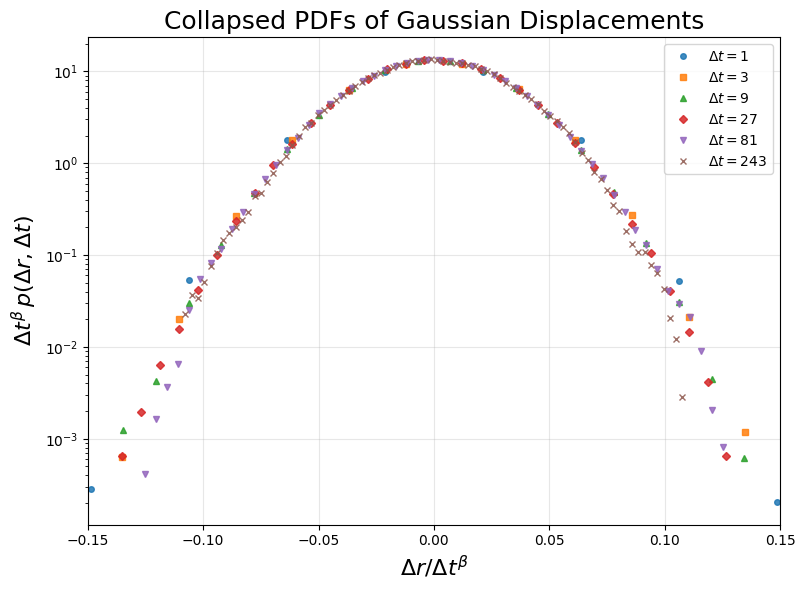

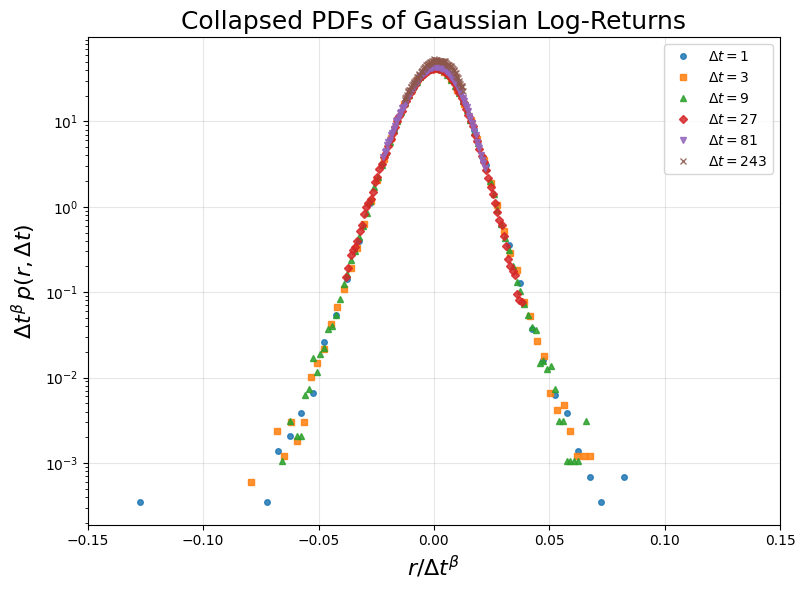

In [6]:
# ==== Collapse signed displacement PDFs for GAUSSIAN walks ====

# For an ideal Gaussian RW you can just set:
beta_collapse_gauss = 0.5      # or use the beta you measured from CCDF cuts

plt.figure(figsize=(8, 6))
markers = ['o', 's', '^', 'D', 'v', 'x']

dt_plot_order = sorted(dt_values)

for idx, dt in enumerate(dt_plot_order):
    if dt >= num_steps:
        continue

    # dt–lag displacements for all walks
    dx_dt = x_gauss[:, dt:] - x_gauss[:, :-dt]
    dy_dt = y_gauss[:, dt:] - y_gauss[:, :-dt]

    all_disp = np.concatenate([dx_dt.ravel(), dy_dt.ravel()])

    if all_disp.size == 0:
        continue

    # recentre (should be ~0 anyway, but good to remove any small drift)
    all_disp = all_disp - all_disp.mean()

    # histogram → PDF over same range as bubbles (adjust if needed)
    bins = 80
    rng = (-1.7, 1.7)
    counts, bin_edges = np.histogram(all_disp, bins=bins, range=rng, density=True)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

    # dynamic scaling factor s(dt) = dt^beta
    s_dt = dt**beta_collapse_gauss

    x_scaled   = bin_centers / s_dt
    pdf_scaled = counts * s_dt   # keeps normalization

    plt.plot(
        x_scaled, pdf_scaled,
        marker=markers[idx % len(markers)],
        linestyle='none',
        alpha=0.85,
        markersize=4,
        label=rf'$\Delta t = {dt}$'
    )

plt.yscale('log')   # comment out for linear y if you prefer
plt.xlabel(r"$\Delta r / \Delta t^{\beta}$", fontsize=16)
plt.ylabel(r"$\Delta t^{\beta} \, p(\Delta r, \Delta t)$", fontsize=16)
plt.title("Collapsed PDFs of Gaussian Displacements", fontsize=18)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.xlim(-0.15, 0.15)
plt.show()


# ==== Collapse signed log-return PDFs for GAUSSIAN walks ====

# Use scaling exponent from CCDF cuts of log-returns, or assume small linear behaviour
# For small log returns in Gaussian increments, beta_lr ≈ 0.5 also holds.
beta_collapse_lr = 0.5      # or replace with your measured beta from CCDF-cut scaling

plt.figure(figsize=(8, 6))
markers = ['o', 's', '^', 'D', 'v', 'x']

dt_plot_order = sorted(dt_values)

for idx, dt in enumerate(dt_plot_order):
    if dt >= num_steps:
        continue

    # dt-lag log returns
    rx = np.log(Sx[:, dt:] / Sx[:, :-dt])
    ry = np.log(Sy[:, dt:] / Sy[:, :-dt])

    # signed log returns
    all_lr = np.concatenate([rx.ravel(), ry.ravel()])
    if all_lr.size == 0:
        continue

    # remove any tiny drift
    all_lr = all_lr - all_lr.mean()

    # histogram → PDF
    bins = 80
    # optional range control — adjust if tails extend further
    rng = (-0.2, 0.2)
    counts, bin_edges = np.histogram(all_lr, bins=bins, range=rng, density=True)
    bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])

    # dynamic scaling factor s(dt) = dt^beta
    s_dt = dt**beta_collapse_lr

    # rescale
    x_scaled   = bin_centers / s_dt
    pdf_scaled = counts * s_dt

    plt.plot(
        x_scaled, pdf_scaled,
        marker=markers[idx % len(markers)],
        linestyle='none',
        alpha=0.85,
        markersize=4,
        label=rf'$\Delta t = {dt}$'
    )

plt.yscale('log')    # comment out if you prefer linear y-axis
plt.xlabel(r"$r / \Delta t^{\beta}$", fontsize=16)
plt.ylabel(r"$\Delta t^{\beta} \, p(r, \Delta t)$", fontsize=16)
plt.title("Collapsed PDFs of Gaussian Log-Returns", fontsize=18)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.xlim(-.15, .15)
plt.show()

Min Sx, Sy: 1.0 1.0


/var/folders/l1/x0797x3512d9sktcpm47npbh0000gn/T/ipykernel_14307/627885465.py:61: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 1e6)


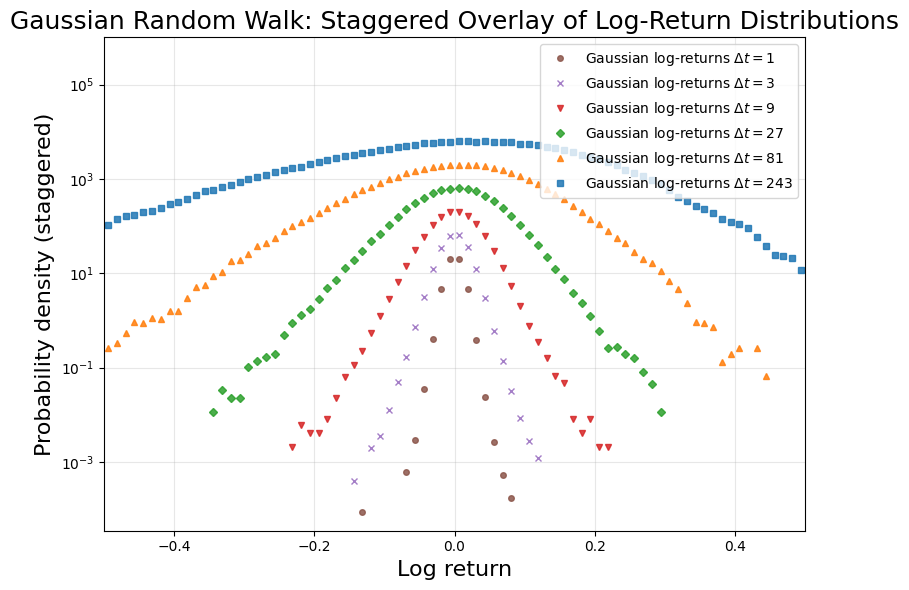

In [7]:
# Log returns of Gaussian walks + staggered overlay
# ==========================================

# 1) Build strictly positive "price-like" series from positions
offset_x = 1.0 - x_gauss.min()
offset_y = 1.0 - y_gauss.min()

Sx = x_gauss + offset_x   # shape (num_walks, num_steps)
Sy = y_gauss + offset_y

# Sanity: ensure positivity
print("Min Sx, Sy:", Sx.min(), Sy.min())

# 2) Staggered overlay of log-return PDFs for different dt

plt.figure(figsize=(8, 6))
markers = ['o', 's', '^', 'D', 'v', 'x']

dt_plot_order = sorted(dt_values, reverse=True)

top_peak = 2e4       # same as before, tune if needed
decade_step = 0.50   # separation between curves in log10 decades

for idx, dt in enumerate(dt_plot_order):
    if dt >= num_steps:
        continue

    # log returns over lag dt
    # r = log(S_{t+dt} / S_t)
    rx = np.log(Sx[:, dt:] / Sx[:, :-dt])
    ry = np.log(Sy[:, dt:] / Sy[:, :-dt])

    # pool components
    all_logret = np.concatenate([rx.ravel(), ry.ravel()])

    # centre (mean ~ 0) for nicer comparison
    all_logret -= all_logret.mean()

    # histogram → PDF
    bins = 80
    # pick a reasonable range for log returns; adjust if you see clipping
    rng = (-0.5, 0.5)
    counts, bin_edges = np.histogram(all_logret, bins=bins, range=rng, density=True)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

    # stagger peaks in log space
    current_peak = counts.max() if counts.max() > 0 else 1.0
    target_peak = top_peak * (10 ** (-decade_step * idx))
    scale = target_peak / current_peak
    counts_scaled = counts * scale

    plt.plot(
        bin_centers, counts_scaled,
        marker=markers[idx % len(markers)], linestyle='none',
        label=rf'Gaussian log-returns $\Delta t = {dt}$',
        alpha=0.85, markersize=4
    )

plt.yscale('log')
plt.xlim(-0.5, 0.5)   # match rng above
plt.ylim(0, 1e6)
plt.xlabel("Log return", fontsize=16)
plt.ylabel("Probability density (staggered)", fontsize=16)
plt.title("Gaussian Random Walk: Staggered Overlay of Log-Return Distributions", fontsize=18)
plt.grid(alpha=0.3)

# reverse legend order to match your bubble-style
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc="upper right")

plt.tight_layout()
plt.show()

Min Sx, Sy: 1.0 1.0


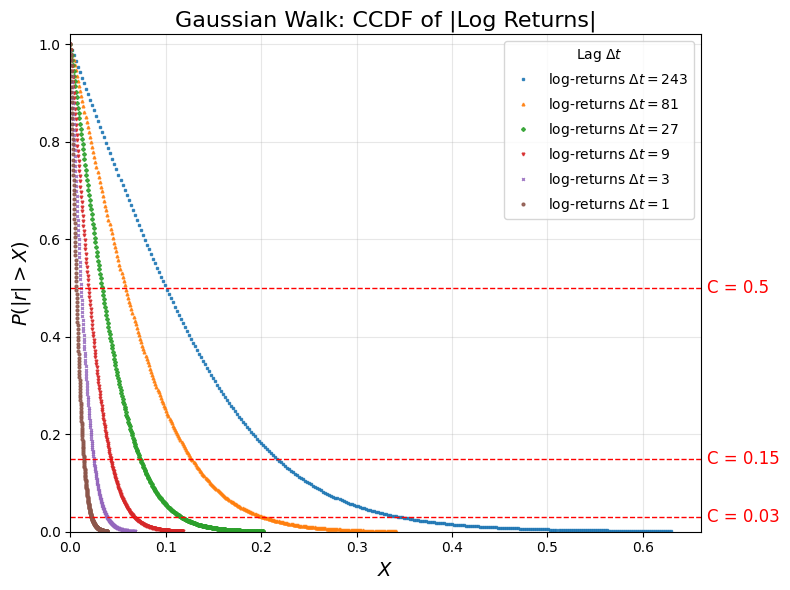

In [8]:
# CCDF for log returns
offset_x = 1.0 - x_gauss.min()
offset_y = 1.0 - y_gauss.min()

Sx = x_gauss + offset_x
Sy = y_gauss + offset_y

print("Min Sx, Sy:", Sx.min(), Sy.min())  # sanity check they’re > 0

plt.figure(figsize=(8, 6))
markers = ['o', 's', '^', 'D', 'v', 'x']

C_vals = [0.50, 0.15, 0.03]
dt_plot_order = sorted(dt_values, reverse=True)

for idx, dt in enumerate(dt_plot_order):
    if dt >= num_steps:
        continue

    # log returns over lag dt
    rx = np.log(Sx[:, dt:] / Sx[:, :-dt])
    ry = np.log(Sy[:, dt:] / Sy[:, :-dt])

    vals = np.abs(np.concatenate([rx.ravel(), ry.ravel()]))

    vals_sorted = np.sort(vals)
    n = vals_sorted.size

    # X grid up to 99.9th percentile of |log-returns|
    X = np.linspace(0, np.quantile(vals_sorted, 0.999), 300)

    F = np.searchsorted(vals_sorted, X, side='right') / n
    CCDF = 1.0 - F

    plt.plot(
        X, CCDF,
        marker=markers[idx % len(markers)],
        linestyle='none', ms=2, alpha=0.85,
        label=rf'log-returns $\Delta t = {dt}$'
    )

# Horizontal C lines
for C in C_vals:
    plt.axhline(y=C, color='red', linestyle='--', linewidth=1)
    xmax = plt.xlim()[1]
    plt.text(
        1.01 * xmax, C, f"C = {C}",
        va='center', ha='left', fontsize=12, color='red'
    )

plt.ylim(0, 1.02)
plt.xlim(left=0)
plt.ylabel(r"$P(|r|>X)$", fontsize=14)
plt.xlabel(r"$X$", fontsize=14)
plt.title("Gaussian Walk: CCDF of |Log Returns|", fontsize=16)
plt.grid(alpha=0.3)
plt.legend(title=r"Lag $\Delta t$")
plt.tight_layout()
plt.show()

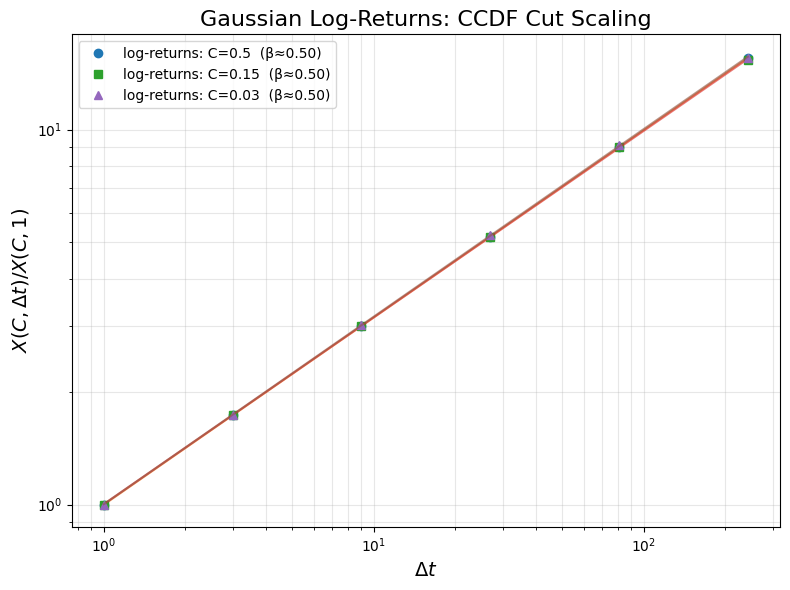

In [9]:
# CCDF CUT SCALING — GAUSSIAN LOG RETURNS
# ==========================================================

# Build synthetic positive series
offset_x = 1 - x_gauss.min()
offset_y = 1 - y_gauss.min()
Sx = x_gauss + offset_x
Sy = y_gauss + offset_y

def get_abs_logreturns_gaussian(dt):
    """Return |log return| sample over lag dt for Gaussian walks."""
    if dt >= num_steps:
        return np.array([])
    
    rx = np.log(Sx[:, dt:] / Sx[:, :-dt])
    ry = np.log(Sy[:, dt:] / Sy[:, :-dt])
    
    vals = np.concatenate([rx.ravel(), ry.ravel()])
    return np.abs(vals)


# ----- precompute -----
abs_lr_samples = {
    dt: get_abs_logreturns_gaussian(dt)
    for dt in dt_plot_order
    if len(get_abs_logreturns_gaussian(dt)) > 0
}

# ----- compute X(C, dt) -----
X_C_dt_lr = {C: {} for C in C_vals}

for C in C_vals:
    q = 1.0 - C
    for dt, vals in abs_lr_samples.items():
        X_C_dt_lr[C][dt] = float(np.quantile(vals, q))


# ==========================================================
# PLOT: scaling: X(C, dt) / X(C, 1)
# ==========================================================

plt.figure(figsize=(8, 6))
for i, C in enumerate(C_vals):
    dts = np.array(sorted(X_C_dt_lr[C].keys()))
    Xs  = np.array([X_C_dt_lr[C][dt] for dt in dts])
    X1  = X_C_dt_lr[C][1]
    
    ratio = Xs / X1

    beta, logA = np.polyfit(np.log(dts), np.log(ratio), 1)
    A = np.exp(logA)
    fit = A * dts**beta

    plt.loglog(
        dts, ratio,
        marker=markers[i % len(markers)],
        linestyle='none',
        label=rf"log-returns: C={C}  (β≈{beta:.2f})"
    )
    plt.loglog(dts, fit, alpha=0.6)

plt.xlabel(r"$\Delta t$", fontsize=14)
plt.ylabel(r"$X(C, \Delta t) / X(C, 1)$", fontsize=14)
plt.title("Gaussian Log-Returns: CCDF Cut Scaling", fontsize=16)
plt.grid(alpha=0.3, which="both")
plt.legend()
plt.tight_layout()
plt.show()